In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [44]:
iris = pd.read_csv('iris.csv')
iris_data = iris.loc[:,['PetalLength', 'SepalLength']]

In [39]:
# MinMax 스캐일링
scaler = MinMaxScaler()
scaler.fit(iris_data)
scaled_data = scaler.transform(iris_data)
scaled_data = pd.DataFrame(data=scaled_data)

,0,1
0,0.067797,0.222222
1,0.067797,0.166667
2,0.050847,0.111111
3,0.084746,0.083333
4,0.067797,0.194444


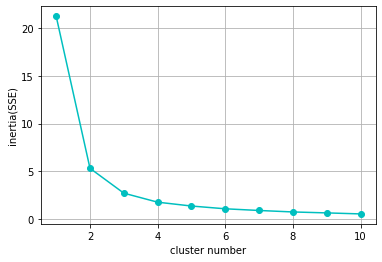

In [47]:
# cluster optimize(elbow law이용)
inertias = []
k_n = range(1,11)
for i in k_n:
    model = KMeans(n_clusters=i,random_state=0)
    model.fit(scaled_data)
    inertias.append(model.inertia_)
plt.figure()
plt.plot(k, inertias, 'co-')
plt.xlabel('cluster number')
plt.ylabel('inertia(SSE)')
plt.grid()

In [41]:
model = KMeans(n_clusters=3,random_state=0)
model.fit(scaled_data)
prediction = model.predict(scaled_data)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1])

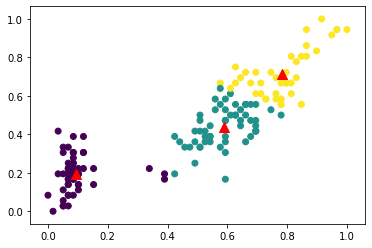

In [42]:
fig, ax = plt.subplots()
ax.scatter(scaled_data.iloc[:,0], scaled_data.iloc[:,1], c=prediction)
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r', marker='^', s=100)
plt.show()